In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

# Função para criar as faixas etarias
def AgeGroup(row):
    if row <= 18:
        return "0-18"
    elif row > 18 and row < 24:
        return "19-23"
    elif row >= 24 and row < 30:
        return "24-29"
    elif row >= 30 and row < 36:
        return "30-35"
    elif row >= 36 and row < 42:
        return "36-41"
    elif row >= 42 and row < 48:
        return "42-47"
    elif row >= 48 and row < 54:
        return "48-53"
    else:
        return "54+"

#lendo o df
df = pd.read_csv('diabetes.csv')

In [57]:
# Criando a coluna Age Group e aplicando a função
df['Age Group'] = df['Age'].apply(AgeGroup)

# Convertendo a coluna 'Age Group' para valores numéricos
encoder = LabelEncoder()
df['Age Group'] = encoder.fit_transform(df['Age Group'])

# Separando as variáveis independentes (X) e dependente (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando a instancia do modelo 
model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.3, max_depth=2, min_samples_split=3, max_leaf_nodes=5)
#Treinando o modelo
model.fit(X_train, y_train)

# Calculando a probabilidade predita
y_pred_proba = model.predict_proba(X_test)[:, 1]



In [58]:
y_pred_class = (y_pred_proba >= 0.6).astype(int)

res = classification_report(y_test, y_pred_class)
print(res)


              precision    recall  f1-score   support

           0       0.80      0.89      0.85       151
           1       0.75      0.59      0.66        80

    accuracy                           0.79       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.79      0.78       231



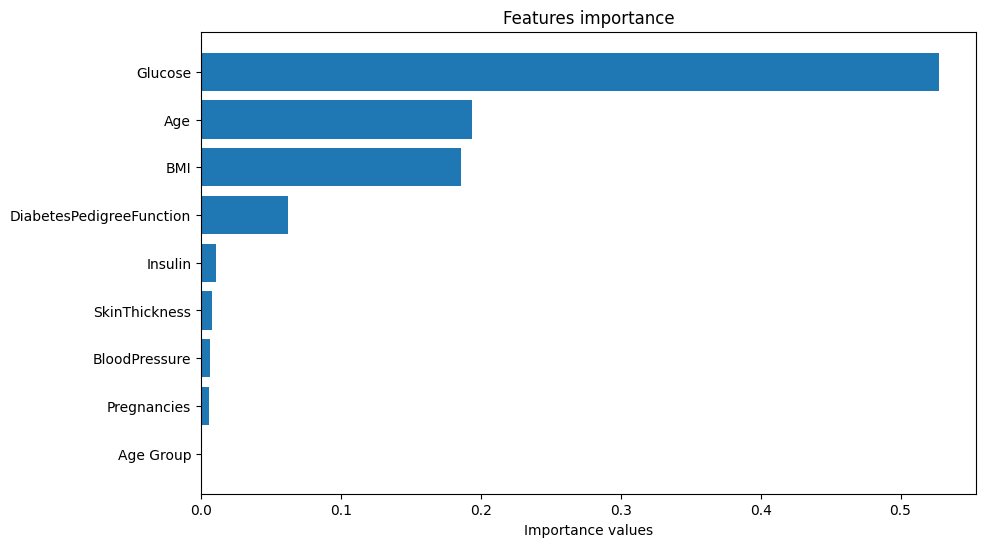

In [59]:
import matplotlib.pyplot as plt
import numpy as np
# Exibindo a importância das características
importances = model.feature_importances_

# Nome das características (colunas de X)
features = X.columns  # Supondo que você tenha um DataFrame pandas para X

# Ordenando as importâncias de forma decrescente
indices = np.argsort(-importances)[::-1]

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6)) # tamanho da janela do grafico
plt.title("Features importance") # titulo
         #todas as colunas      , valores das colunas
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), features[indices])
plt.xlabel("Importance values")
plt.show()


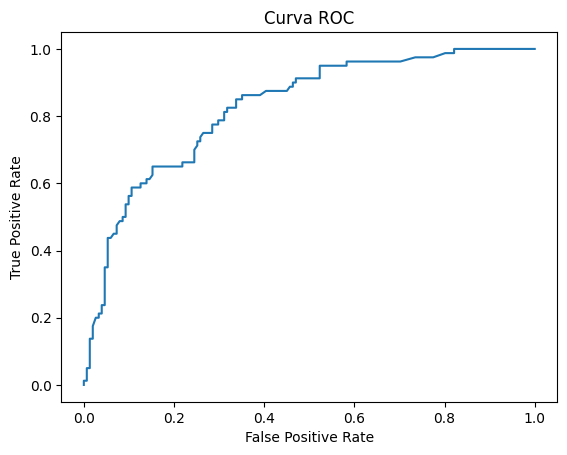

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.show()


In [61]:
print(features)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Age Group'],
      dtype='object')
